# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    



In [2]:
# Define function to transform images and generate more images

def transform_image(img):
    rows,cols,ch = img.shape
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pts2 = np.float32([[0,10],[20,5],[10,25]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
#     plt.subplot(121),plt.imshow(img),plt.title('Input')
#     plt.subplot(122),plt.imshow(dst),plt.title('Output')
#     plt.show()
    return dst

In [3]:
# Adding more training images by transforming training set

import cv2
from skimage import data
from skimage import transform
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# train['features'][:] = scale( train['features'][:], axis=0, with_mean=True, with_std=True, copy=True )
# train['features'] -= np.mean(train['features'],axis=0)



# Adding transformed images
train_transform_features = np.array(train['features'], copy=True)    
train_transform_labels = train['features']


for i in range(0,len(train['features'])-1):
    img = train['features'][i]
    dst = transform_image(img)
    train_transform_features[i] = dst
    
    
train_feat = np.concatenate((train['features'],train_transform_features))
train_lab = np.concatenate((train['labels'],train['labels']))
    
X_train, y_train = train_feat, train_lab
X_test, y_test = test['features'], test['labels']
print(len(train['features']))
print(len(test['features']))

    
print('train_transform_features =',len(train_transform_features))
print(len(train_feat),len(train_lab))
print(len(X_train),len(y_train))


39209
12630
train_transform_features = 39209
78418 78418
78418 78418


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 78418
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

33043
32
32


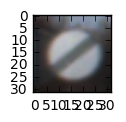

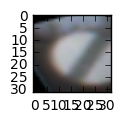

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(train['features']))
image = X_train[index].squeeze()
print(index)
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])


index = index+39209
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])



# ----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
from sklearn.utils import shuffle

### Feel free to use as many code cells as needed.
X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
First I added transformed image for each training image. Secondly I shuffled the data as part of preprocessing. Shuffling helps in reducing overfitting and correlation between two consecutive images.

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size = .2, random_state = 0)
print('Train-',len(X_train),'Validation-',len(X_validation))

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))


Train- 62734 Validation- 15684


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Test - I am using given test dataset

Train - I splitted train dataset into 80:20 and used 80% as train dataset

Validation - Remaining 20% is validation set

I generated  equal number of transformed data by rotating each image to include more number of images for training. Its just a rotated image so not much different.

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

In [9]:
# Main Lenet function definition 

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.05
    keep_prob = 0.6
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # dropout to the neural network
    # conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # dropout to the neural network
    #conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 64.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 64), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(64))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
    # SOLUTION: Activation.
    fc3    = tf.nn.relu(fc3)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 64. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(64, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

In [10]:
#Features and Labels
#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I am using LeNet architecture. It takes a 32x32x3 image and goes through multiple layers. First layer is convolutional layer followed by subsampling layer. This get repeated one more time. After these layer, there are two fully connected layers and in the end there is a output layer with 43 classes. Sizes for each layer input and output is given in the comment before the layer implementation. I am using Adam Optimizer and also included dropout to avoid over fitting.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [12]:
# Model Evaluation
# Evaluate how well the loss and accuracy of the model for a given dataset.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
# Train the model
# Run the training data through the training pipeline to train the model.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")
    
    
# 0.961 - 20,128
# 0.951 - 10,64
# 0.943 - 10,256
# 0.961 - 20,256
# 0.967 - 50,128
# 0.985 - 50,128

Training...

EPOCH 1 ...
Validation Accuracy = 0.835

EPOCH 2 ...
Validation Accuracy = 0.879

EPOCH 3 ...
Validation Accuracy = 0.938

EPOCH 4 ...
Validation Accuracy = 0.916

EPOCH 5 ...
Validation Accuracy = 0.954

EPOCH 6 ...
Validation Accuracy = 0.959

EPOCH 7 ...
Validation Accuracy = 0.961

EPOCH 8 ...
Validation Accuracy = 0.958

EPOCH 9 ...
Validation Accuracy = 0.960

EPOCH 10 ...
Validation Accuracy = 0.963

EPOCH 11 ...
Validation Accuracy = 0.961

EPOCH 12 ...
Validation Accuracy = 0.970

EPOCH 13 ...
Validation Accuracy = 0.964

EPOCH 14 ...
Validation Accuracy = 0.962

EPOCH 15 ...
Validation Accuracy = 0.970

EPOCH 16 ...
Validation Accuracy = 0.965

EPOCH 17 ...
Validation Accuracy = 0.969

EPOCH 18 ...
Validation Accuracy = 0.972

EPOCH 19 ...
Validation Accuracy = 0.978

EPOCH 20 ...
Validation Accuracy = 0.974

EPOCH 21 ...
Validation Accuracy = 0.972

EPOCH 22 ...
Validation Accuracy = 0.968

EPOCH 23 ...
Validation Accuracy = 0.966

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I am using following values - 

EPOCHS = 50,
BATCH_SIZE = 128,
mu = 0,
sigma = 0.05,
keep_prob = 0.6,
training rate = 0.001

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I followed LeNet architecture for this problem  with some  experiments on hyper parameters and usage of dropout.  I tried with  different  EPOCH, batch size along with hyper parameters like mu, sigma and keep_prob. LeNet suits for this problem as it is multi layered and  feed features from one layer to next after branching. Different  stages at the connected layers provide better  local and global extracts. One-Hot Encoding was used to convert label numbers to vectors. One reason for using Lenet is its easiness to train even on a decent laptop.

In [14]:
# Evaluate the performance of the model on the test set.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.901


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


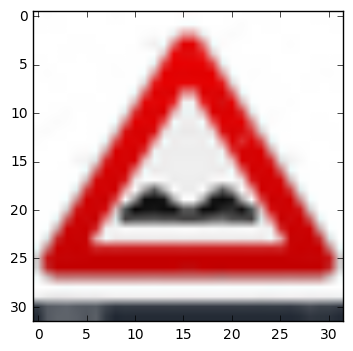

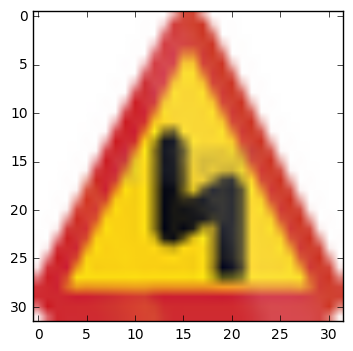

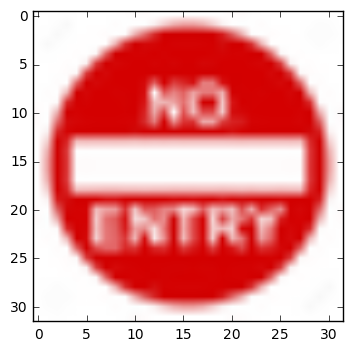

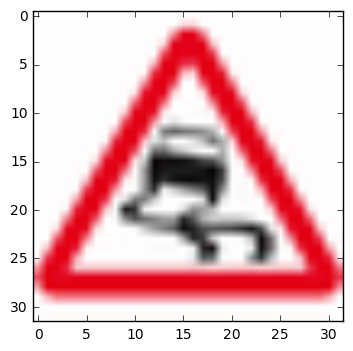

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image
from numpy import array
import glob, os
import matplotlib.pyplot as plt

size = 32, 32
i = 0
X_test_new = np.array(train['features'][0:6], copy=True)    


plt.figure(figsize = (1,1))


for infile in glob.glob("new images/*"):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    img = im.resize((32, 32), Image.ANTIALIAS)
    arr = array(img)
    print(arr.shape)
    X_test_new[i] = arr
    plt.figure()
    plt.imshow(X_test_new[i])
    i = i+1
    
    
    
y_test_new = [22,19,17,23,14,13]
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I picked six images for this part of experiment. They are captured in different atmosphere as compared to existing data set. I plotted them also for visualization.

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_new, y_test_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.667


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Accuracy (66.67%) is significantly lower than the provided data set. It can be due to different atmosphere and method of capturing images

In [17]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(x)
# logits = LeNet(X_test_new)
with tf.Session() as sess:
#     output = sess.run(softmax, feed_dict={logits: logit_data})

    smax = sess.run(softmax, feed_dict = {x: X_test_new})
#     print(smax)
    print(sess.run(tf.nn.top_k(tf.constant(smax), k=3)))
#     print(tf.nn.top_k(softmax))

TopKV2(values=array([[[[  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         ..., 
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01]],

        [[  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         ..., 
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01]],

        [[  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         [  3.33333343e-01,   3.33333343e-01,   3.33333343e-01],
         [  3.33333343e-01,   3.33333343e-

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
I am  using  tf.nn.top_k for softmax values for new images with k= 3 for top three probabilities. In all of the above cases,  our LeNet network predict first choice with highest probability. If the model is incorrect intially then it does not goes and correct its prediction.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.